In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Portfolio assignment 3: M/M/S Queue

## Statement of the problem 

A problem that arises in a number of environments including retail is the process of queueing and how to make this as efficient as possible. Many retailers aim to minimise wait times at their tills. This report will investigate how I can reduce the customers wait time by increasing the number of servers. I will look specifically at a queue with 'S' number of servers, this is known as an M/M/S queue.

## Research

To prepare for this report I completed the following blocky exercise:
* http://gtribello.github.io/mathNET/poisson-process-exercise.html

I read the following python notebook that demonstrated some key ideas when modelling a queue:
* 'queues-notebook.ipynb'

Finally I read the lecture notes, Chapter 24, on Markov chains. This explained critical analytical results.


## M/M/1 Queue

### Theory 

Before looking at the M/M/S queue I have decided to first investigate the workings of the simpler M/M/1 queue. This process is called M/M/1 because the arrival times of customers and the service times of customers are both memoryless. This is where the two M's come from in the name of the process. This is a feature of Markov processes that means the previous arrivals or service times have no effect on the current one. Furthermore, the 1 in the name of this queue states that we have only 1 server. Our M/M/1 queue has infinite capacity.

#### * Transition graph *

When modeling the transition graph for an M/M/1 queue with infinite capacity we must take into consideration the fact that we are dealing with a continuous-time Markov process. Because of this we can only draw the transition graph to show how the state can change over a small increment in time that we will call 'h'. 

![alttext](Transition2.png)

#### *Transition Matrix *

The transition matrix for the M/M/1 queue with infinite capacity will be as follows;

$$
\mathbf{A} = \left(
\begin{matrix}
-\lambda & \lambda & 0 & 0 & 0 & 0 & 0 & 0 & ... & 0 \\
\mu & -\lambda -\mu & \lambda & 0 & 0 & 0 & \vdots & \vdots & \cdots & 0 \\
0 & \mu & -\lambda -\mu & \lambda & 0 & 0 & 0 & 0 & \cdots & 0 \\
0 & 0 & \mu & -\lambda -\mu & \lambda & 0 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \mu & -\lambda -\mu & \lambda & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & 0 & \mu & -\lambda -\mu & \lambda & 0 & \cdots & 0 \\
0 & 0 & 0 & 0 & 0 & \mu & -\lambda -\mu & \lambda & \cdots & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \mu & -\lambda -\mu & \ddots & 0 \\
0 & \vdots & \vdots & \vdots & \vdots & \vdots & 0 & \mu & -\lambda -\mu & \lambda \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \mu & -\mu
\end{matrix}
\right)
$$

#### * Equilibrium *

In the M/M/1 queue people are constantly arriving and leaving. The question that we need to ask ourselves is; do the number of arrivals and departures ever balance out. Of course, we can easily understand that if the rate of arrivals $\lambda$ is greater than the rate of departures $\mu$ then the length of the queue will increase infinitely and there will be no equilibrium state reached. However, consider the scenario where we do have an equilibrium state. For this to happen we must have a row vector $\pi$ such that;
$$\pi A=0$$

By completing matrix multiplication the first column gives;
$$ \pi_0(-\lambda) + \pi_1(\mu)=0  \    \rightarrow  \    \pi_1=\frac{\lambda} {\mu}\pi_0$$

The second column gives;
$$\pi_0(\lambda) + \pi_1(-\lambda -\mu) + \pi_2 \mu =0   \   \rightarrow  \   \pi_2=\frac{\lambda} {\mu}\pi_1$$  

We can see the following pattern emerge;
$$\pi_n=\frac{\lambda} {\mu}\pi_{n-1}$$ 

Furthermore, we can see that iteravely;
$$\pi_n=\frac{\lambda} {\mu}\pi_{n-1} = \frac{\lambda} {\mu}\frac{\lambda} {\mu}\pi_{n-2}$$ 

And so 
$$\pi_n=\left(\frac{\lambda} {\mu}\right)^n\pi_0$$
where $\pi_n$ is the probability of having n people in the queue.

In this way, the row vector $\pi$ will be our probability distribution, so long as we ensure that it is properly normalised. By this I mean we need to make sure that $$ \sum_{n=0}^{\infty} \pi_n = 1$$

#### *Queue length and waiting time*

Given what we have learned we can now ask ourselves; How long is the queue on average?

Our model of this problem forms a geometric distribution and as such the expected value for the length of the queue can be given by:
$$ L = \sum_{n=0}^{\infty} n\pi_n = (1-p) \sum_{n=0}^{\infty} np^n$$

where $p$ is the ratio $\frac{\lambda}{\mu}$.

Then we know that the average length of the queue must be:
$$ L=\frac{p}{1-p}=\frac{\lambda}{\mu- \lambda}$$



### Software

My first step to model the M/M/1 queue was to define the distribution of the arrival times and service times. Both of these times are identically distributed Poisson random variables. I used the function below to call upon such variables with the parameter set as 'lam'.

In [4]:
def exp(lam):
    u=np.random.uniform(0,1)
    ex=-(1/lam)*np.log(u)
    return ex

My next step was to look at exactly what happens to each person in the queue. I have set up various loops below that return the arrival and service times of each customer and calculates when they leave. The code takes into consideration the fact that if the second customer arrives before the first is finished being served then they will not begin to be served until the first leaves. 

Once the loops calculate the finish time for each customer it also calculates the total time spent in the store. I have plotted this information on the graph that follows.

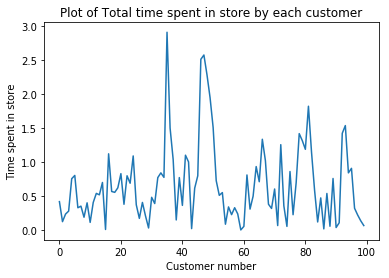

In [63]:
service=100*[0]
for i in range(100):
    service[i]=exp(2)
    
arrival=100*[0]
arrival[0]=0
for i in range(1,100):
    arrival[i]=arrival[i-1]+exp(1)
    
start,finish,tot=100*[0],100*[0],100*[0]
finish[0]=service[0]
for i in range(100):
    if finish[i-1]<arrival[i]:
        start[i]=arrival[i]
    else:
        start[i]=finish[i-1]
    finish[i]=start[i]+service[i]
    tot[i]=finish[i]-arrival[i]
plt.plot(tot)
plt.title('Plot of Total time spent in store by each customer')
plt.xlabel('Customer number')
plt.ylabel('Time spent in store')
plt.show()

From the plot above I could clearly see that most customers spent less than 2 hours in the store. To get more precise information I wrote the code below which counts exactly how many of the customers spent less than 1 hour in store, less than two hours and so on. I plotted this information in a histogram and used resampling techniques to get errorbars on my data.

In [64]:
def queue1():
    service=100*[0]
    for i in range(100):
        service[i]=exp(2)

    arrival=100*[0]
    arrival[0]=0
    for i in range(1,100):
        arrival[i]=arrival[i-1]+exp(1)

    start,finish,tot=100*[0],100*[0],100*[0]
    finish[0]=service[0]
    for i in range(100):
        if finish[i-1]<arrival[i]:
            start[i]=arrival[i]
        else:
            start[i]=finish[i-1]
        finish[i]=start[i]+service[i]
        tot[i]=finish[i]-arrival[i]
    return tot


def hist1():
    histo=7*[0]
    for i in range (100): 
        for j in range(7):
            if queue1()[i]<j: 
                histo[j]=histo[j]+1
                break
    return histo

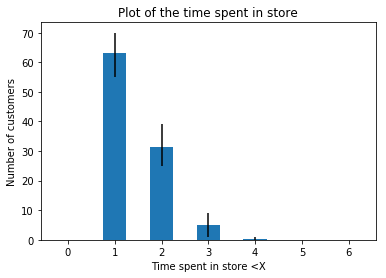

In [66]:
histo_samples = np.zeros([100,7])
for i in range(100) : histo_samples[i] = hist1()
    
    
lower, upper, mean = 7*[0], 7*[0], 7*[0]
xvals = np.linspace( 0, 6, 7 )
for j in range(7):
    mean[j] = sum( histo_samples[:,j]) / len( histo_samples[:,j] )
    sortedl = np.sort( histo_samples[:,j] )
    lower[j] = mean[j] - sortedl[4]
    upper[j] = sortedl[94] - mean[j]
    
fig, ax= plt.subplots()
prob=ax.bar(xvals,mean,7*[0.5],yerr=[lower,upper])
plt.xlabel("Time spent in store <X")
plt.ylabel("Number of customers")
plt.title('Plot of the time spent in store')
plt.show()

My next two cells of code simply track how the number of people in the queue changes over time and plots this information.

In [68]:
nevents=100
events = []
for i in range(nevents) : 
    events.append( [arrival[i],+1] )
    events.append( [finish[i],-1] )
    
events.sort()

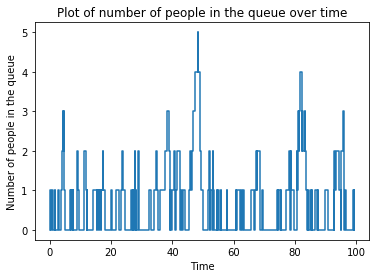

In [70]:
nq, xvals, yvals = 0, [0], [0]
for i in range(len(events)) :
    time = events[i][0]        # Time at which something happened
    change = events[i][1]      # Change in length of queue that happened at this time
    xvals.append( time )       # Append current time and previous length of queue 
    yvals.append( nq )
    nq = nq + change           # Accumulate current length of queue
    xvals.append( time )       # Append current time and new length of queue  
    yvals.append( nq )         # by plotting two points at each time we ensure that the graph goes vertically upwards
                               # when the queue changes length.
    
plt.plot( xvals, yvals, '-' )
plt.title('Plot of number of people in the queue over time')
plt.ylabel('Number of people in the queue')
plt.xlabel('Time')
plt.show()

The last section of code on the M/M/1 queue looks at the fraction of time that there was X number of people in the queue. This information was once again plotted in a histogram and resampled to create the relevant error bars. On the same histogram, I have plotted the analytical solution of the probability distribution for this queue in orange. 

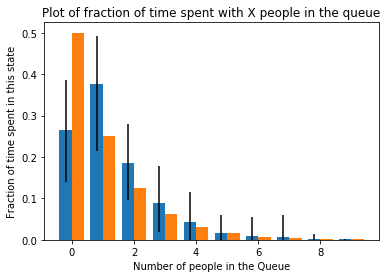

In [97]:
def qlength1():  
    service=100*[0]
    for i in range(100):
        service[i]=exp(2)
    
    arrival=100*[0]
    arrival[0]=0
    for i in range(1,100):
        arrival[i]=arrival[i-1]+exp(1)
    
    start,finish,tot=100*[0],100*[0],100*[0]
    nq, xvals, yvals, qlength = 0, [0], [0], [0]*100
    nevents=100
    events = []
    finish[0]=service[0]
    for i in range(100):
        if finish[i-1]<arrival[i]:
            start[i]=arrival[i]
        else:
            start[i]=finish[i-1]
        finish[i]=start[i]+service[i]
        tot[i]=finish[i]-arrival[i]
        

        events.append( [arrival[i],+1] )
        events.append( [finish[i],-1] )
        events.sort()

        time = events[i][0]        
        change = events[i][1]      
       
        nq = nq + change           
               
        ltimeq=events[2*i+1][0]-events[2*i][0]  
        qlength[nq]=qlength[nq]+ltimeq
    return qlength/sum(qlength)

histo_samples = np.zeros([100,100])
for i in range(100) : histo_samples[i,:] = qlength1()
    
lower1, upper1, mean1 = 10*[0], 10*[0], 10*[0]
xvals1 = np.linspace(-0.2, 8.8 ,10)
xvals2= np.linspace(0.2, 9.2, 10)
for j in range(10):
    mean1[j] = sum( histo_samples[:,j]) / len( histo_samples[:,j] )
    sortedl = np.sort( histo_samples[:,j] )
    lower1[j] = mean1[j] - sortedl[4]
    upper1[j] = sortedl[94] - mean1[j]
    
sd=[0]*10
sd[0]=1/2
for i in range(1,10):
    sd[i]=sd[i-1]/2
    
fig, ax= plt.subplots()
prob=ax.bar(xvals1,mean1,10*[0.4],yerr=[lower1,upper1])
prob=ax.bar(xvals2,sd,10*[0.4])
plt.xlabel("Number of people in the Queue")
plt.ylabel("Fraction of time spent in this state")
plt.title('Plot of fraction of time spent with X people in the queue')
plt.show()

## M/M/S Queue 

The M/M/S queue is a much more complicated system to understand as there are multiple servers working at one time. S represents the number of servers working. When modeling the queue I have assumed that the next customer in line will go to the first available server. As expected the analytical results on a more complex system such as the M/M/S queue are much more complicated. In fact, these analytical results are beyond my knowledge and understanding. However, my programming knowledge now allows me to compute the same numerical results that as I did with the M/M/1 queue.

### Software

In the same way as the M/M/1 queue I have modelled the queue and plotted the total time spent in the store by each customer in the graph below.

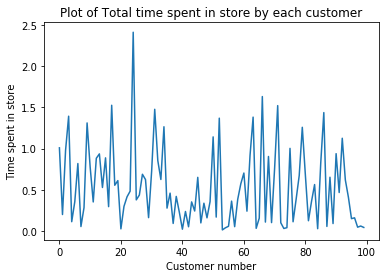

In [87]:
nevents=100
s=3

service=nevents*[0]
for i in range(nevents):
    service[i]=exp(2)

arrival=nevents*[0]
arrival[0]=0
for i in range(1,nevents):
    arrival[i]=arrival[i-1]+exp(1)

start,finish,tot=nevents*[0],nevents*[0],nevents*[0]
for i in range (s):
    start[i]=arrival[i]
    finish[i]=service[i]

tills=[]
start,finish,tot=nevents*[0],nevents*[0],nevents*[0]
finish[0]=service[0]
for i in range(nevents):
    tills.append(finish[i])
    tills.sort()
    for j in range(s,1,-1):
        if finish[i-j]<arrival[i]:
            start[i]=arrival[i]
            break
    else:
        start[i]=tills[0]
    finish[i]=start[i]+service[i]
    tot[i]=finish[i]-arrival[i]
    del tills[0]
    
plt.plot(tot)
plt.title('Plot of Total time spent in store by each customer')
plt.xlabel('Customer number')
plt.ylabel('Time spent in store')
plt.show()

For the M/M/S queue the plot above shows that most cutomers spent less that 1 hour in the store. Once again I want more concrete data for this and so I have written a function that counts the number of customers that spent less than X hours in the store. 

In [88]:
def queue2(a):
    nevents=100
    s=3

    service=nevents*[0]
    for i in range(nevents):
        service[i]=exp(2)

    arrival=nevents*[0]
    arrival[0]=0
    for i in range(1,nevents):
        arrival[i]=arrival[i-1]+exp(1)

    start,finish,tot=nevents*[0],nevents*[0],nevents*[0]
    for i in range (s):
        start[i]=arrival[i]
        finish[i]=service[i]

    tills=[]
    start,finish,tot=nevents*[0],nevents*[0],nevents*[0]
    finish[0]=service[0]
    for i in range(nevents):
        tills.append(finish[i])
        tills.sort()
        for j in range(s,1,-1):
            if finish[i-j]<arrival[i]:
                start[i]=arrival[i]
                break
        else:
            start[i]=tills[0]
        finish[i]=start[i]+service[i]
        tot[i]=finish[i]-arrival[i]
        del tills[0]
        
    return tot[a]


def hist2():
    histo=7*[0]
    for i in range (100): 
        for j in range(7):
            if queue2(i)<j: 
                histo[j]=histo[j]+1
                break
    return histo

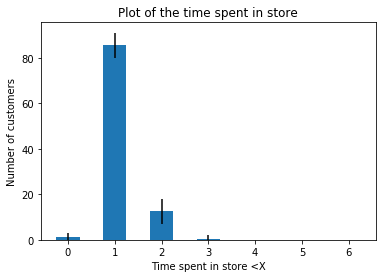

In [96]:
histo_samples = np.zeros([100,7])
for i in range(100) : histo_samples[i] = hist2()
    
    
lower, upper, mean = 7*[0], 7*[0], 7*[0]
xvals = np.linspace( 0, 6, 7 )
for j in range(7):
    mean[j] = sum( histo_samples[:,j]) / len( histo_samples[:,j] )
    sortedl = np.sort( histo_samples[:,j] )
    lower[j] = mean[j] - sortedl[4]
    upper[j] = sortedl[94] - mean[j]
    
fig, ax= plt.subplots()
prob=ax.bar(xvals,mean,7*[0.5],yerr=[lower,upper])
plt.xlabel("Time spent in store <X")
plt.ylabel("Number of customers")
plt.title('Plot of the time spent in store')
plt.show()

This section tracks how the number of people in the queue changes over time.

In [24]:
nevents=100
events = []
for i in range(nevents) : 
    events.append( [arrival[i],+1] )
    events.append( [finish[i],-1] )
    
events.sort()

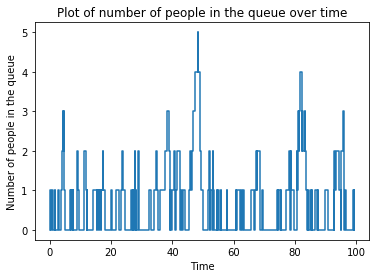

In [95]:
nq, xvals, yvals = 0, [0], [0]
for i in range(len(events)) :
    time = events[i][0]        # Time at which something happened
    change = events[i][1]      # Change in length of queue that happened at this time
    xvals.append( time )       # Append current time and previous length of queue 
    yvals.append( nq )
    nq = nq + change           # Accumulate current length of queue
    xvals.append( time )       # Append current time and new length of queue  
    yvals.append( nq )         # by plotting two points at each time we ensure that the graph goes vertically upwards
                               # when the queue changes length.
    
plt.plot( xvals, yvals, '-' )
plt.title('Plot of number of people in the queue over time')
plt.ylabel('Number of people in the queue')
plt.xlabel('Time')
plt.show()

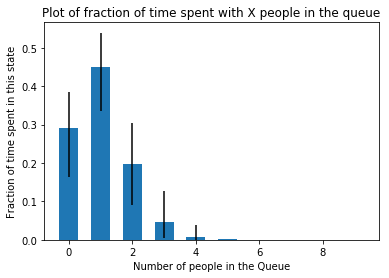

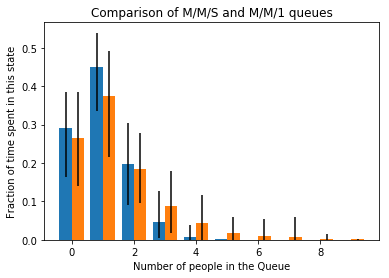

In [99]:
def qlength2():  
    nevents=100
    s=4

    service=nevents*[0]
    for i in range(nevents):
        service[i]=exp(2)

    arrival=nevents*[0]
    arrival[0]=0
    for i in range(1,nevents):
        arrival[i]=arrival[i-1]+exp(1)

    start,finish,tot=nevents*[0],nevents*[0],nevents*[0]
    for i in range (s):
        start[i]=arrival[i]
        finish[i]=service[i]
    
    nq, xvals, yvals, qlength = 0, [0], [0], [0]*nevents
    events = []
    tills=[]
    start,finish,tot=nevents*[0],nevents*[0],nevents*[0]
    finish[0]=service[0]
    for i in range(nevents):
        tills.append(finish[i])
        tills.sort()
        for j in range(s,1,-1):
            if finish[i-j]<arrival[i]:
                start[i]=arrival[i]
                break
        else:
            start[i]=tills[0]
        finish[i]=start[i]+service[i]
        tot[i]=finish[i]-arrival[i]
        del tills[0]
        

        events.append( [arrival[i],+1] )
        events.append( [finish[i],-1] )
        events.sort()

        time = events[i][0]       
        change = events[i][1]     
        nq = nq + change           
        ltime=events[2*i+1][0]-events[2*i][0]  
        qlength[nq]=qlength[nq]+ltime
    return qlength/sum(qlength)


histo_samples = np.zeros([100,100])
for i in range(100) : histo_samples[i,:] = qlength2()
    
lower, upper, mean = 10*[0], 10*[0], 10*[0]
xvals1 = np.linspace(-0.2, 8.8 ,10)
xvals2= np.linspace(0.2, 9.2, 10)
for j in range(10):
    mean[j] = sum( histo_samples[:,j]) / len( histo_samples[:,j] )
    sortedl = np.sort( histo_samples[:,j] )
    lower[j] = mean[j] - sortedl[4]
    upper[j] = sortedl[94] - mean[j]
    
fig, ax= plt.subplots()
prob=ax.bar(np.linspace(0,9,10),mean,10*[0.6],yerr=[lower,upper])
plt.xlabel("Number of people in the Queue")
plt.ylabel("Fraction of time spent in this state")
plt.title('Plot of fraction of time spent with X people in the queue')
plt.show()

fig, ax= plt.subplots()
prob=ax.bar(xvals1,mean,10*[0.4],yerr=[lower,upper])
prob=ax.bar(xvals2,mean1,10*[0.4],yerr=[lower1,upper1])
plt.xlabel("Number of people in the Queue")
plt.ylabel("Fraction of time spent in this state")
plt.title('Comparison of M/M/S and M/M/1 queues')
plt.show()

The plot above compares the M/M/S and M/M/1 queue specifically looking at queue length. We can see that maintaining the same service and arrival times in both queues, the M/M/S queue which in this example has 4 servers is much more efficient than the M/M/1. There are very few instances of a queue of 3 people or more occurring. This is a perfect example of how companies can use mathematical modeling to optimise performance and minimise staffing costs. 